# Worksheet 14

Name:  dayu li
UID: u61453443

### Topics

- Naive Bayes
- Model Evaluation

### Naive Bayes

| Attribute A | Attribute B | Attribute C | Class |
|-------------|-------------|-------------|-------|
| Yes         | Single      | High        | No    |
| No          | Married     | Mid         | No    |
| No          | Single      | Low         | No    |
| Yes         | Married     | High        | No    |
| No          | Divorced    | Mid         | Yes   |
| No          | Married     | Low         | No    |
| Yes         | Divorced    | High        | No    |
| No          | Single      | Mid         | Yes   |
| No          | Married     | Low         | No    |
| No          | Single      | Mid         | Yes   |

a) Compute the following probabilities:

- P(Attribute A = Yes | Class = No)  
3/7

- P(Attribute B = Divorced | Class = Yes) 
1/3

- P(Attribute C = High | Class = No)
3/7

- P(Attribute C = Mid | Class = Yes)
1

b) Classify the following unseen records:

- (Yes, Married, Mid)
no
- (No, Divorced, High)
no
- (No, Single, High)
no
- (No, Divorced, Low)
no

### Model Evaluation

a) Write a function to generate the confusion matrix for a list of actual classes and a list of predicted classes

In [1]:
actual_class = ["Yes", "No", "No", "Yes", "No", "No", "Yes", "No", "No", "No"]
predicted_class = ["Yes", "No", "Yes", "No", "No", "No", "Yes", "Yes", "Yes", "No"]

def confusion_matrix(actual, predicted):
    tp = tn = fp = fn = 0
    for a, p in zip(actual, predicted):
        if a == "Yes" and p == "Yes":
            tp += 1
        elif a == "No" and p == "No":
            tn += 1
        elif a == "Yes" and p == "No":
            fn += 1
        elif a == "No" and p == "Yes":
            fp += 1
    return {"TP": tp, "TN": tn, "FP": fp, "FN": fn}

print(confusion_matrix(actual_class, predicted_class))

{'TP': 2, 'TN': 4, 'FP': 3, 'FN': 1}


b) Assume you have the following Cost Matrix:

|            | predicted = Y | predicted = N |
|------------|---------------|---------------|
| actual = Y |       -1      |       5       |
| actual = N |        10     |       0       |

What is the cost of the above classification?

2*(-1)+4*(0)+3*(10)+1*(5)=33

c) Write a function that takes in the actual values, the predictions, and a cost matrix and outputs a cost. Test it on the above example.

In [ ]:
def calculate_cost(actual, predicted, cost_matrix):
    
    tp = tn = fp = fn = 0
    for a, p in zip(actual, predicted):
        if a == "Yes" and p == "Yes":
            tp += 1
        elif a == "No" and p == "No":
            tn += 1
        elif a == "Yes" and p == "No":
            fn += 1
        elif a == "No" and p == "Yes":
            fp += 1
            
    total_cost = (tp * cost_matrix["TP"]) + (tn * cost_matrix["TN"]) + (fp * cost_matrix["FP"]) + (fn * cost_matrix["FN"])
    return total_cost

# Cost matrix
cost_matrix = {
    "TP": -1,  
    "TN": 0,  
    "FP": 10,  
    "FN": 5    
}

actual_class = ["Yes", "No", "No", "Yes", "No", "No", "Yes", "No", "No", "No"]
predicted_class = ["Yes", "No", "Yes", "No", "No", "No", "Yes", "Yes", "Yes", "No"]

calculate_cost(actual_class, predicted_class, cost_matrix)

d) Implement functions for the following:

- accuracy
- precision
- recall
- f-measure

and apply them to the above example.

In [2]:
def accuracy(tp, tn, fp, fn):
    return (tp + tn) / (tp + tn + fp + fn)

def precision(tp, fp):
    return tp / (tp + fp) if (tp + fp) != 0 else 0

def recall(tp, fn):
    return tp / (tp + fn) if (tp + fn) != 0 else 0

def f_measure(precision, recall):
    return (2 * precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

tp = 2
tn = 4
fp = 3
fn = 1

acc = accuracy(tp, tn, fp, fn)
prec = precision(tp, fp)
rec = recall(tp, fn)
f_meas = f_measure(prec, rec)

acc, prec, rec, f_meas

(0.6, 0.4, 0.6666666666666666, 0.5)

## Challenge (Midterm prep part 2)

In this exercise you will update your submission to the titanic competition.

a) First let's add new numerical features / columns to the datasets that might be related to the survival of individuals.

- `has_cabin` should have a value of 0 if the `cabin` feature is `nan` and 1 otherwise
- `family_members` should have the total number of family members (by combining `SibSp` and `Parch`)
- `title_type`: from the title extracted from the name, we will categorize it into 2 types: `common` for titles that many passengers have, `rare` for titles that few passengers have. Map `common` to 1 and `rare` to 0. Describe what threshold you used to define `common` and `rare` titles and how you found it.
- `fare_type`: using Kmeans clustering on the fare column, find an appropriate number of clusters / groups of similar fares. Using the clusters you created, `fare_price` should be an ordinal variable that represents the expensiveness of the fare. For example if you split fare into 3 clusters ( 0 - 15, 15 - 40, and 40+ ) then the `fare_price` value should be `0` for `fare` values 0 - 15, `1` for 15 - 40, and `2` for 40+.
- Create an addition two numerical features of your invention that you think could be relevant to the survival of individuals.

Note: The features must be numerical because the sklearn `DecisionTreeClassifier` can only take on numerical features.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import numpy as np
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df['has_cabin'] = train_df['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)
train_df['family_members'] = train_df['SibSp'] + train_df['Parch']

train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

title_counts = train_df['Title'].value_counts()
threshold = 10  
common_titles = title_counts[title_counts > threshold].index.tolist()

train_df['title_type'] = train_df['Title'].apply(lambda x: 1 if x in common_titles else 0)

kmeans = KMeans(n_clusters=6, random_state=0).fit(train_df[['Fare']])
train_df['fare_type'] = kmeans.labels_


cluster_means = train_df.groupby('fare_type')['Fare'].mean().sort_values().index
fare_type_mapping = {old: new for new, old in enumerate(cluster_means)}
train_df['fare_type'] = train_df['fare_type'].map(fare_type_mapping)

train_df['deck_level'] = train_df['Cabin'].str[0].map(lambda x: ord(x) - ord('A') + 1 if pd.notna(x) else 0)

age_bins = [0, 18, 65, np.inf]
train_df['age_group'] = pd.cut(train_df['Age'], bins=age_bins, labels=False, right=False)
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})

for column in train_df.columns:
    mode_value = train_df[column].mode()[0]
    train_df[column].fillna(mode_value, inplace=True)
train_df.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,has_cabin,family_members,Title,title_type,fare_type,deck_level,age_group
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,B96 B98,S,0,1,Mr,1,0,0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,1,Mrs,1,2,3,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,0,0,Miss,1,0,0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,1,Mrs,1,2,3,1.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,B96 B98,S,0,0,Mr,1,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",0,24.0,0,0,374910,8.0500,B96 B98,S,0,0,Mr,1,0,0,1.0
96,97,0,1,"Goldschmidt, Mr. George B",0,71.0,0,0,PC 17754,34.6542,A5,C,1,0,Mr,1,1,1,2.0
97,98,1,1,"Greenfield, Mr. William Bertram",0,23.0,0,1,PC 17759,63.3583,D10 D12,C,1,1,Mr,1,2,4,1.0
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",1,34.0,0,1,231919,23.0000,B96 B98,S,0,1,Mrs,1,1,0,1.0


b) Using a method covered in class, tune the parameters of a decision tree model on the titanic dataset (containing all numerical features including the ones you added above). Evaluate this model locally and report it's performance.

Note: make sure you are not tuning your parameters on the same dataset you are using to evaluate the model. Also explain how you know you are not overfitting to the training set.

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

X = train_df[['has_cabin', 'family_members', 'title_type', 'fare_type', 'Age', 'Fare','deck_level','Sex','Pclass']]  # Adjust as per your dataset
y = train_df['Survived']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.95) 
X_pca = pca.fit_transform(X_scaled)
X_train, X_val, y_train, y_val = train_test_split(X_pca, y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_val)
print(f"Validation Accuracy: {accuracy_score(y_val, y_pred)}")


Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Score: 0.8132079188417217
Validation Accuracy: 0.8379888268156425


c) Try reducing the dimension of the dataset and create a Naive Bayes model. Evaluate this model.

In [68]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#pca = PCA(n_components=0.95) 
#X_pca = pca.fit_transform(X_scaled)
#X_train, X_val, y_train, y_val = train_test_split(X_pca, y, test_size=0.2, random_state=42)

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_val)
print(f"Validation Accuracy: {accuracy_score(y_val, y_pred)}")

Validation Accuracy: 0.7821229050279329


d) Create an ensemble classifier using a combination of KNN, Decision Trees, and Naive Bayes models. Evaluate this classifier.

In [79]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
knn = KNeighborsClassifier(n_neighbors=5)
dt = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=4, min_samples_split=10, random_state=42)
nb = GaussianNB()

ensemble = VotingClassifier(estimators=[
    ('knn', knn),
    ('dt', dt),
    ('nb', nb)
], voting='hard')
ensemble.fit(X_train, y_train)
from sklearn.metrics import accuracy_score

y_pred = ensemble.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy}")

Validation Accuracy: 0.8435754189944135


e) Update your kaggle submission using the best model you created (best model means the one that performed the best on your local evaluation)

In [80]:
test_df['has_cabin'] = test_df['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)
test_df['family_members'] = test_df['SibSp'] + test_df['Parch']

test_df['Title'] = test_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

test_df['title_type'] = test_df['Title'].apply(lambda x: 1 if x in common_titles else 0)

test_df['fare_type'] = kmeans.predict(test_df[['Fare']])

test_df['fare_type'] = test_df['fare_type'].map(fare_type_mapping)

test_df['deck_level'] = test_df['Cabin'].str[0].map(lambda x: ord(x) - ord('A') + 1 if pd.notna(x) else 0)

test_df['age_group'] = pd.cut(test_df['Age'], bins=age_bins, labels=False, right=False)

test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})

for column in test_df.columns:
    if not test_df[column].mode().empty:
        mode_value = test_df[column].mode()[0]
    else:
        if test_df[column].dtype == 'float':
            mode_value = 0.0 
        elif test_df[column].dtype == 'int':
            mode_value = 0  
        else:
            mode_value = "Unknown"  
    test_df[column].fillna(mode_value, inplace=True)

X1 = test_df[['has_cabin', 'family_members', 'title_type', 'fare_type', 'Age', 'Fare','deck_level','Sex','Pclass']]  
X_test_scaled = scaler.transform(X1)  
X_test_pca = pca.transform(X_test_scaled)
predictions =ensemble.predict(X_test_pca)

submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": predictions
})

submission.to_csv("submission.csv", index=False)

## Some useful code for the midterm

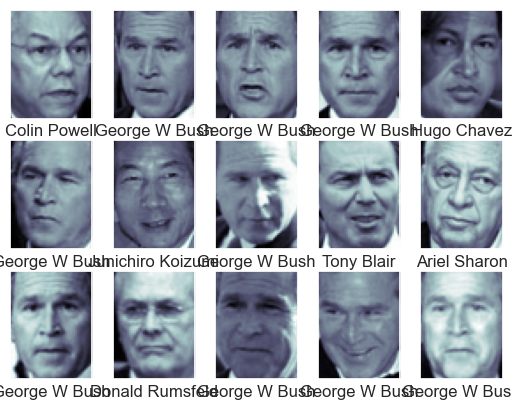

{'svc__C': 10, 'svc__gamma': 0.005}


In [ ]:
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import fetch_lfw_people
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

sns.set()

# Get face data
faces = fetch_lfw_people(min_faces_per_person=60)

# plot face data
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])
plt.show()

# split train test set
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

pca = PCA(n_components=150, whiten=True)
svc = SVC(kernel='rbf', class_weight='balanced')
svcpca = make_pipeline(pca, svc)

# Tune model to find best values of C and gamma using cross validation
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
kfold = 10
grid = GridSearchCV(svcpca, param_grid, cv=kfold)
grid.fit(Xtrain, ytrain)

print(grid.best_params_)

# use the best params explicitly here
pca = PCA(n_components=150, whiten=True)
svc = SVC(kernel='rbf', class_weight='balanced', C=10, gamma=0.005)
svcpca = make_pipeline(pca, svc)

model = BaggingClassifier(svcpca, n_estimators=100).fit(Xtrain, ytrain)
yfit = model.predict(Xtest)

fig, ax = plt.subplots(6, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)
plt.show()

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

print("Accuracy = ", accuracy_score(ytest, yfit))